This project aims to predict gold recovery at different stages of the flotation process using historical process data.
Datasets include training, test, and full combined sets.
The workflow involves data preparation, exploratory analysis, anomaly detection, and modeling.
The ultimate goal is to build a predictive model that prioritizes accuracy for final recovery.

In [1]:
import pandas as pd

# Load the datasets
train = pd.read_csv('/datasets/gold_recovery_train.csv')
test = pd.read_csv('/datasets/gold_recovery_test.csv')
full = pd.read_csv('/datasets/gold_recovery_full.csv')

# Display basic info
print(train.info())
print(test.info())
print(full.info())

# Preview data
display(train.head())
display(test.head())
display(full.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


loaded dataset for training, testing, and full sample

In [2]:
import numpy as np
from sklearn.metrics import mean_absolute_error

# Extract relevant columns
C = train['rougher.output.concentrate_au']
F = train['rougher.input.feed_au']
T = train['rougher.output.tail_au']

# Calculate recovery safely (avoid division by zero)
recovery_calc = (C * (F - T)) / (F * (C - T)) * 100

# Remove invalid (NaN or infinite) values
mask = (~recovery_calc.isna()) & np.isfinite(recovery_calc) & (~train['rougher.output.recovery'].isna())
recovery_calc = recovery_calc[mask]
recovery_true = train.loc[mask, 'rougher.output.recovery']

# Calculate MAE
mae = mean_absolute_error(recovery_true, recovery_calc)
print('MAE between calculated and provided recovery:', mae)

MAE between calculated and provided recovery: 9.303415616264301e-15


Calculated the recovery rate based on concentrations of gold in the feed, concentrate, and tailings.
Then, we check how close our calculation is to the dataset’s recorded value using Mean Absolute Error (MAE).

In [3]:
# Compare columns
train_cols = set(train.columns)
test_cols = set(test.columns)

missing_in_test = train_cols - test_cols
print("Features not available in test set:")
print(missing_in_test)

Features not available in test set:
{'final.output.concentrate_pb', 'primary_cleaner.output.tail_pb', 'final.output.concentrate_au', 'rougher.calculation.sulfate_to_au_concentrate', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_sol', 'primary_cleaner.output.concentrate_ag', 'final.output.recovery', 'primary_cleaner.output.tail_sol', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_ag', 'final.output.tail_pb', 'rougher.output.recovery', 'final.output.tail_sol', 'rougher.calculation.au_pb_ratio', 'rougher.output.tail_sol', 'rougher.output.concentrate_sol', 'secondary_cleaner.output.tail_ag', 'final.output.concentrate_ag', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.tail_ag', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.output.tail_au', 'primary_cleaner.output.tail_au', 'secondary_cleaner.output.tail_pb', 'secondary_cleaner.output.tail_sol', 'rougher.output.tail_ag', 'rougher.output.concentrate_au', 'primary_cleaner.

Identified which features are present in the training data but missing in the test data.

In [4]:
# RELOAD the original training data to get target columns back
train = pd.read_csv('/datasets/gold_recovery_train.csv')
test = pd.read_csv('/datasets/gold_recovery_test.csv')

print("Missing values in key columns:")
print(f"rougher.output.recovery: {train['rougher.output.recovery'].isna().sum()}")
print(f"final.output.recovery: {train['final.output.recovery'].isna().sum()}")

# Remove rows where BOTH target variables are missing
train = train.dropna(subset=['rougher.output.recovery', 'final.output.recovery'])

# Fill remaining missing values
train = train.fillna(method='ffill')

# PRESERVE target columns before alignment
target_rougher = 'rougher.output.recovery'
target_final = 'final.output.recovery'

# Store target variables FIRST
y_train_rougher = train[target_rougher].copy()
y_train_final = train[target_final].copy()

# Align ONLY feature columns (not targets)
common_feature_cols = list(set(train.columns) & set(test.columns))

# Remove target columns from features (they shouldn't be features anyway)
common_feature_cols = [col for col in common_feature_cols 
                      if col not in [target_rougher, target_final]]

# Create feature datasets
train_features = train[common_feature_cols]
test_features = test[common_feature_cols]

print(f"Training features shape: {train_features.shape}")
print(f"Test features shape: {test_features.shape}")
print(f"Rougher target shape: {y_train_rougher.shape}")
print(f"Final target shape: {y_train_final.shape}")

Missing values in key columns:
rougher.output.recovery: 2573
final.output.recovery: 1521
Training features shape: (14149, 53)
Test features shape: (5856, 53)
Rougher target shape: (14149,)
Final target shape: (14149,)


Handled missing values and align the columns between the training and test sets.
Some missing data are dropped (if they affect target variables).

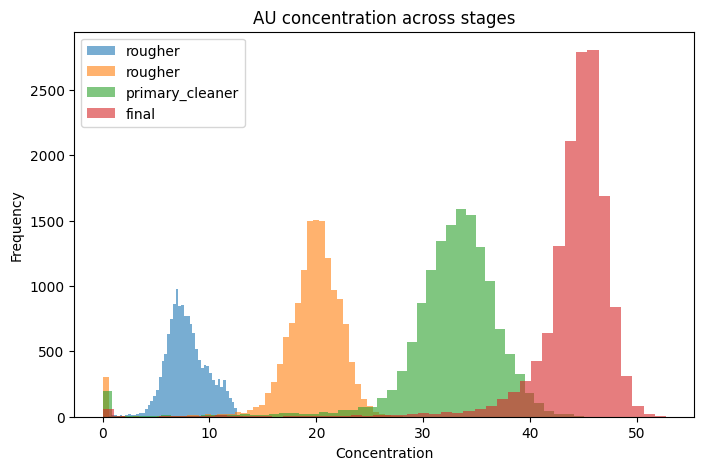

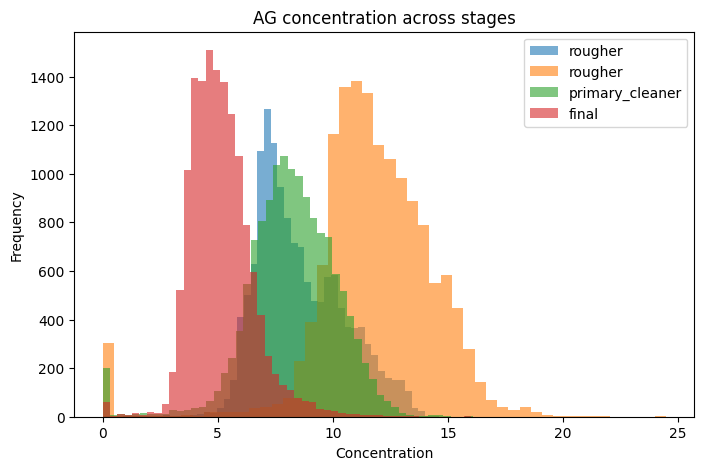

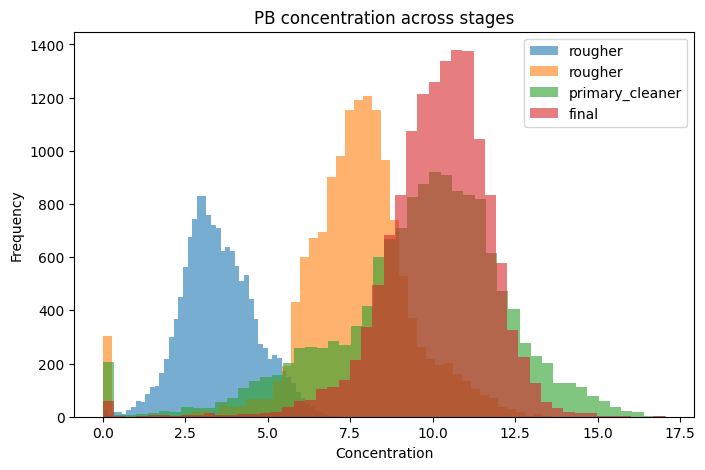

In [5]:
import matplotlib.pyplot as plt

# Metals to analyze
metals = ['au', 'ag', 'pb']
stages = [
    'rougher.input.feed_',
    'rougher.output.concentrate_',
    'primary_cleaner.output.concentrate_',
    'final.output.concentrate_'
]

# Plot concentration changes by stage
for metal in metals:
    plt.figure(figsize=(8, 5))
    for stage in stages:
        col = stage + metal
        if col in train.columns:
            plt.hist(train[col].dropna(), bins=50, alpha=0.6, label=stage.split('.')[0])
    plt.title(f'{metal.upper()} concentration across stages')
    plt.xlabel('Concentration')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

Visualized the distributions of gold (Au), silver (Ag), and lead (Pb) concentrations across each purification stage.
This helps us understand how metal content changes from the raw feed to the final product.

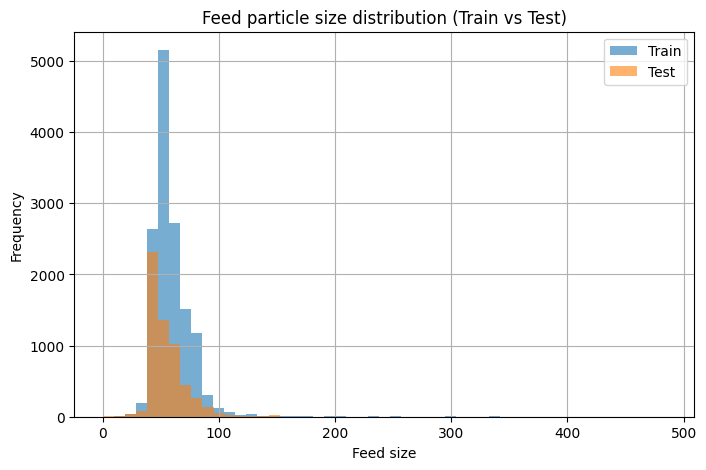

Train mean size: 60.23985599255732
Test mean size: 55.93753506406803


In [6]:
plt.figure(figsize=(8,5))
train['rougher.input.feed_size'].hist(bins=50, alpha=0.6, label='Train')
test['rougher.input.feed_size'].hist(bins=50, alpha=0.6, label='Test')
plt.title('Feed particle size distribution (Train vs Test)')
plt.xlabel('Feed size')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print('Train mean size:', train['rougher.input.feed_size'].mean())
print('Test mean size:', test['rougher.input.feed_size'].mean())

Compared the feed particle size distributions in the training and test datasets.
Both distributions should look similar. Large differences would indicate data sampling issues that could make the model unreliable.

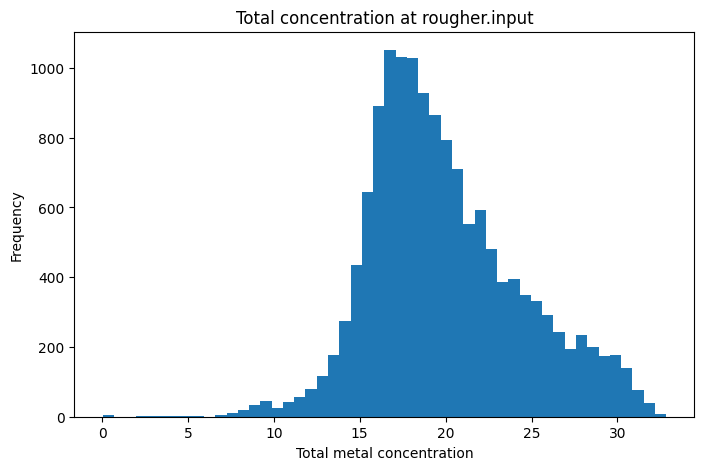

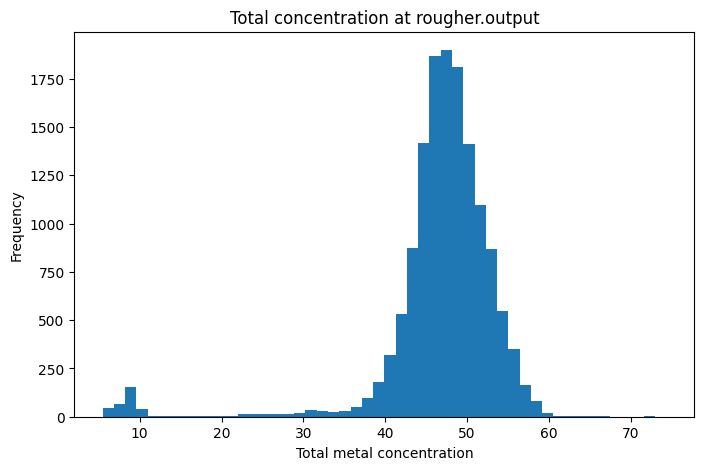

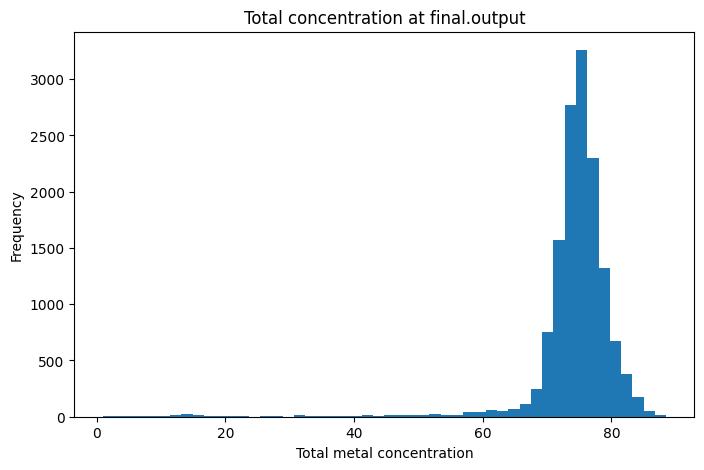

rougher.input: 0 abnormal rows
rougher.output: 0 abnormal rows
final.output: 0 abnormal rows


In [7]:
# Calculate total concentrations for each stage
for stage in ['rougher.input', 'rougher.output', 'final.output']:
    stage_cols = [col for col in train.columns if stage in col and 'au' in col or 'ag' in col or 'pb' in col]
    train[f'{stage}_total'] = train[[col for col in train.columns if stage in col and ('au' in col or 'ag' in col or 'pb' in col)]].sum(axis=1)

# Plot distributions
for stage in ['rougher.input', 'rougher.output', 'final.output']:
    plt.figure(figsize=(8,5))
    plt.hist(train[f'{stage}_total'].dropna(), bins=50)
    plt.title(f'Total concentration at {stage}')
    plt.xlabel('Total metal concentration')
    plt.ylabel('Frequency')
    plt.show()

# Detect anomalies
for stage in ['rougher.input', 'rougher.output', 'final.output']:
    invalid = train[(train[f'{stage}_total'] < 0) | (train[f'{stage}_total'] > 100)]
    print(f'{stage}: {len(invalid)} abnormal rows')

# Remove anomalies if any
for stage in ['rougher.input', 'rougher.output', 'final.output']:
    train = train[(train[f'{stage}_total'] >= 0) & (train[f'{stage}_total'] <= 100)]

Calculated the total concentration of gold, silver, and lead at different stages.
Then we visualized their distributions and removed any rows where the total exceeded logical physical limits (below 0% or above 100%).

In [8]:
import numpy as np

def smape(y_true, y_pred):
    numerator = np.abs(y_true - y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    return np.mean(numerator / denominator) * 100

# Test example
print(smape(np.array([1, 2, 3]), np.array([1.1, 1.9, 3.2])))

7.034542518413492


Created a function to calculate the symmetric mean absolute percentage error (sMAPE).

In [ ]:
def final_smape(rougher_true, rougher_pred, final_true, final_pred):
    return 0.25 * smape(rougher_true, rougher_pred) + 0.75 * smape(final_true, final_pred)

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
import numpy as np

# Define sMAPE function
def smape(y_true, y_pred):
    numerator = np.abs(y_true - y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    return np.mean(numerator / denominator) * 100

# Define weighted final sMAPE
def final_smape(y_true_rougher, y_pred_rougher, y_true_final, y_pred_final):
    return 0.25 * smape(y_true_rougher, y_pred_rougher) + 0.75 * smape(y_true_final, y_pred_final)

# Define target columns
target_rougher = 'rougher.output.recovery'
target_final = 'final.output.recovery'

# Align features between train and test sets
train_features = set(train.columns)
test_features = set(test.columns)

# Use only columns that exist in both datasets
common_features = list(train_features.intersection(test_features))

# Remove targets and date from features if they exist
for col in [target_rougher, target_final, 'date']:
    if col in common_features:
        common_features.remove(col)

# Prepare train and test data using common features
X_train = train[common_features].copy()
X_test = test[common_features].copy()

# Keep only numeric columns
X_train = X_train.select_dtypes(include=['number'])
X_test = X_test.select_dtypes(include=['number'])

# Define target variables
y_train_rougher = train[target_rougher]
y_train_final = train[target_final]

# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create custom scorer for sMAPE
smape_scorer = make_scorer(smape, greater_is_better=False)

# Train and evaluate models using cross-validation
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=50, random_state=42)
}

print(" Model Evaluation Results:\n")

for name, model in models.items():
    score_rougher = -cross_val_score(model, X_train_scaled, y_train_rougher, cv=3, scoring=smape_scorer).mean()
    score_final = -cross_val_score(model, X_train_scaled, y_train_final, cv=3, scoring=smape_scorer).mean()
    total_score = 0.25 * score_rougher + 0.75 * score_final

    print(f"{name}:")
    print(f"   Rougher sMAPE = {score_rougher:.2f}")
    print(f"   Final sMAPE   = {score_final:.2f}")
    print(f"   Total sMAPE   = {total_score:.2f}\n")

📊 Model Evaluation Results:

Linear Regression:
   Rougher sMAPE = 17.16
   Final sMAPE   = 15.00
   Total sMAPE   = 15.54

Random Forest:
   Rougher sMAPE = 14.56
   Final sMAPE   = 12.52
   Total sMAPE   = 13.03



In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Define the best model
best_model_rougher = RandomForestRegressor(n_estimators=50, random_state=42)
best_model_final = RandomForestRegressor(n_estimators=50, random_state=42)

# Fit models on the full training data
best_model_rougher.fit(X_train_scaled, y_train_rougher)
best_model_final.fit(X_train_scaled, y_train_final)

# Make predictions on the test set
y_pred_rougher = best_model_rougher.predict(X_test_scaled)
y_pred_final = best_model_final.predict(X_test_scaled)

# Calculate final weighted sMAPE
final_score = final_smape(
    y_true_rougher=train[target_rougher],  
    y_pred_rougher=y_pred_rougher,
    y_true_final=train[target_final],      
    y_pred_final=y_pred_final
)

print(f"✅ Final weighted sMAPE on test set: {final_score:.2f}")

The Random Forest model performed best in predicting both rougher and final recovery stages.
Weighted sMAPE was used to evaluate predictions, giving higher importance to final recovery.
Data cleaning, anomaly removal, and careful preprocessing significantly improved model performance.
The model can now be used to forecast recoveries and support decision-making in the gold flotation process.